#텍스트 전처리(Text Preprocessing)

- 텍스트를 자연어 처리를 위해 용도에 맞도록 사전에 표준화 하는 작업
- 텍스트 내 정보를 유지하고, 중복을 제거하여 분석 효율성을 높이기 위해 전처리를 수행

1) 토큰화(Tokenizing)
- 텍스트를 자연어 처리를 위해 분리하는 것
- 토큰화는 단어별로 분리하는 "단어 토큰화(Word Tokenization)"과 문장별로 분리하는 "문장 토큰화(Sentence Tokenization)"으로 구분  
=> 이후 실습에서는 단어 토큰화를 "토큰화"로 통일하여 칭함

2) 품사 부착(Pos Tagging)
- 각 토큰에 품사 정보를 추가
- 분석시에 불필요한 품사를 제거하거나(예. 조사, 접속사 등) 필요한 품사를 필터링 하기 위해 사용

3) 개체명 인식(NER, Named Entity Recognition)
- 각 토큰의 개체구분(기관, 인물, 지역, 날짜 등) 태그를 부착
- 텍스트가 무엇과 관련되어 있는지 구분하기 위해 사용
- 예를 들어, 과일의 apple과 기업의 apple을 구분하는 방법이 개체명 인식임.

4) 원형복원(Stemming & Lemmatization)
- 각 토큰의 원형을 복원함으로써 토큰을 표준화 하여 불필요한 데이터 중복을 방지  
(= 단어의 수를 줄일 수 있어 연산 효율성을 높임)  

 - 어간추출(Stemming): 품사를 무시하고 규칙에 기반하여 어간을 추출
 - 표제어 추출(Lemmatization): 품사정보를 유지하여 표제어 추출

5) 불용어 처리(Stopword)
 - 자연어 처리를 위해 불필요한 요소를 제거하는 작업
 - 불필요한 품사를 제거하는 작업과 불필요한 단어를 제거하는 작업으로 구성
 - 불필요한 토큰을 제거함으로써 연산의 효율성을 높임

#1. 영문 전처리 연습

NLTK lib(https://www.nltk.org/)사용

## 1.1 실습용 영문기사 수집

온라인 기사를 바로 수집하여 실습데이터로 사용
https://www.forbes.com/sites/adrianbridgwater/2019/04/15/what-drove-the-ai-renaissance/#4a0130481f25

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = 'https://www.forbes.com/sites/adrianbridgwater/2019/04/15/what-drove-the-ai-renaissance/#4a0130481f25'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
eng_news = soup.select('p') #[class = 'speakable-paragraph']
eng_text = eng_news[3].get_text()

eng_text

'It is the present-day darling of the tech world. The current renaissance of Artificial Intelligence (AI) with its sister discipline Machine Learning (ML) has led every IT firm worth its salt to engineer some form of AI onto its platform, into its toolsets and throughout its software applications.'

## 1.2 영문토큰화
https://www.nltk.org/api/nltk.tokenize.html

In [ ]:
!pip install nltk

In [ ]:
#word_tokenize(): 단어와 구두점(온점, 컴마, 물음표, 세미콜론, 느낌표 등과 같은 기호)으로

import nltk
nltk.download('punkt')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
text =  "James is working at Disney in London"
word_tokens = word_tokenize(text)
print(word_tokens)

[nltk_data] Downloading package punkt to /home/kimjt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kimjt/nltk_data...


['James', 'is', 'working', 'at', 'Disney', 'in', 'London']


In [ ]:
#word_tokenize(): 단어와 구두점(온점, 컴마, 물음표, 세미콜론, 느낌표 등과 같은 기호)으로
import nltk
from nltk.tokenize import word_tokenize

token1 = word_tokenize(eng_text)
print(token1)

['It', 'is', 'the', 'present-day', 'darling', 'of', 'the', 'tech', 'world', '.', 'The', 'current', 'renaissance', 'of', 'Artificial', 'Intelligence', '(', 'AI', ')', 'with', 'its', 'sister', 'discipline', 'Machine', 'Learning', '(', 'ML', ')', 'has', 'led', 'every', 'IT', 'firm', 'worth', 'its', 'salt', 'to', 'engineer', 'some', 'form', 'of', 'AI', 'onto', 'its', 'platform', ',', 'into', 'its', 'toolsets', 'and', 'throughout', 'its', 'software', 'applications', '.']


In [ ]:
#WordPunctTokenizer(): 알파벳과 알파벳이 아닌 문자를 구분하여 토큰화
import nltk
from nltk.tokenize import WordPunctTokenizer

text =  "James is working at Disney in London"
wordpuncttoken = WordPunctTokenizer().tokenize(text)
print(wordpuncttoken)

['James', 'is', 'working', 'at', 'Disney', 'in', 'London']


In [ ]:
#TreebankWordTokenizer(): 정규표현식에 기반한 토큰화
import nltk
from nltk.tokenize import TreebankWordTokenizer

text =  "James is working at Disney in London"
treebankwordtoken = TreebankWordTokenizer().tokenize(text)
print(treebankwordtoken)

['James', 'is', 'working', 'at', 'Disney', 'in', 'London']


## 1.3 영문 품사 부착(PoS tagging)

분리한 토큰마다 품사를 부착한다.   
https://www.nltk.org/api/nltk.tag.html

태그목록: https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

taggedToken = pos_tag(word_tokens)
print(taggedToken)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kimjt/nltk_data...


[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


##1.4 개체명 인식(NER, Named Entity Recognition)
http://www.nltk.org/api/nltk.chunk.html


개체명 인식(Named Entity Recognition)이란 말 그대로 이름을 가진 개체(named entity)를 인식하겠다는 것을 의미합니다.   
즉, 어떤 이름을 의미하는 단어를 보고는 그 단어가 어떤 유형인지를 인식하는 것을 말합니다.

예를 들어 제임스는 2018년에 골드만삭스에 입사했다. 라는 문장이 있을 때, 사람(person), 조직(organization), 시간(time)에 대해 개체명 인식을 수행하는 모델이라면 다음과 같은 결과를 보여줍니다.

- 제임스 : 사람
- 2018년 : 시간
- 골드만삭스 : 조직

In [ ]:
nltk.download('words')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package words to /home/kimjt/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/kimjt/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
from nltk import ne_chunk
neToken = ne_chunk(taggedToken)
print(neToken)

(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  in/IN
  (GPE London/NNP))


James는 PERSON(사람), Disney는 조직(ORGANIZATION), London은 위치(GPE)

## 1.5 원형복원
각 토큰의 원형을 복원하여 표준화한다

### 1.5.1 어간추출(Stemming)
- 규칙에 기반하여 토큰을 표준화
- ing제거, ful제거 등  
http://www.nltk.org/api/nltk.chunk.html

규칙 상세: http://www.nltk.org/api/nltk.chunk.html


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
print("running -> " + ps.stem("running"))
print("believes -> "+ps.stem('believes'))
print('using ->' + ps.stem("using"))
print("conversation ->" + ps.stem('conversation'))
print('organization ->'+ ps.stem('organization'))
print('studies -> '+ ps.stem("studies"))

running -> run
believes -> believ
using ->use
conversation ->convers
organization ->organ
studies -> studi


### 1.5.2 표제어 추출(Lemmatization)
- 품사정보를 보존하여 토큰을 표준화

http://www.nltk.org/api/nltk.chunk.html

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/kimjt/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

In [ ]:
print("running -> " + wl.lemmatize("running"))
print("believes -> "+wl.lemmatize('believes'))
print('using ->' + wl.lemmatize("using"))
print("conversation ->" + wl.lemmatize('conversation'))
print('organization ->'+ wl.lemmatize('organization'))
print('studies -> '+ wl.lemmatize("studies"))

running -> running
believes -> belief
using ->using
conversation ->conversation
organization ->organization
studies -> study


## 1.6 불용어 처리(Stopword)

In [ ]:
stopPos = ["IN", "CC", "UH", "TO", "MD", "DT", "VBZ", "VBP"]

# 최빈어 조회: 최빈어를 조회하여 불용어 제거 대상을 선정
from collections import Counter
Counter(taggedToken).most_common()

[(('James', 'NNP'), 1),
 (('is', 'VBZ'), 1),
 (('working', 'VBG'), 1),
 (('at', 'IN'), 1),
 (('Disney', 'NNP'), 1),
 (('in', 'IN'), 1),
 (('London', 'NNP'), 1)]

In [ ]:
stopWord = [",", "be", "able"]

In [ ]:
word = []
for tag in taggedToken:
  if tag[1] not in stopPos:
    if tag[0] not in stopWord:
      word.append(tag[0])

print(word)

['James', 'working', 'Disney', 'London']


## 1.7 영문 텍스트 전처리 종합

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger') #pos tagging
nltk.download('words') #NER
nltk.download('maxnet_ne_chuncker') #NER
nltk.download('wordnet') #Lemmatization

from nltk.tokenize import TreebankWordTokenizer
token = TreebankWordTokenizer().tokenize("Obama loves fried chicken of KFC")
print('token:', token)

from nltk import pos_tag
TaggedToken = pos_tag(token)
print('tagged token:', TaggedToken)

from nltk.stem import PorterStemmer
ps = PorterStemmer()
print("loves -> " + ps.stem("loves"))
print("fried => " + ps.stem('fried'))

from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
print("loves -> " + wl.lemmatize("loves"))
print("fried => " + wl.lemmatize('fried'))

#불용어 처리
StopPos = ['IN']
StopWord = ["fried"]

word = []
for tag in TaggedToken:
  if tag[1] not in StopPos:
    if tag[0] not in StopWord:
      word.append(wl.lemmatize(tag[0]))

print(word)

token: ['Obama', 'loves', 'fried', 'chicken', 'of', 'KFC']
tagged token: [('Obama', 'NNP'), ('loves', 'VBZ'), ('fried', 'VBN'), ('chicken', 'NN'), ('of', 'IN'), ('KFC', 'NNP')]
loves -> love
fried => fri
loves -> love
fried => fried
['Obama', 'love', 'chicken', 'KFC']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kimjt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /home/kimjt/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Error loading maxnet_ne_chuncker: Package
[nltk_data]     'maxnet_ne_chuncker' not found in index
[nltk_data] Downloading package wordnet to /home/kimjt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1.8 Tensorflow - Text preprocessing

### 1.8.1 Tokenizer
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

In [ ]:
eng_text

'It is the present-day darling of the tech world. The current renaissance of Artificial Intelligence (AI) with its sister discipline Machine Learning (ML) has led every IT firm worth its salt to engineer some form of AI onto its platform, into its toolsets and throughout its software applications.'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(split=' ', char_level=False) # 토큰화 함수 지정

# 단어 인덱스 구축
tokenizer.fit_on_texts([eng_text])

In [ ]:
word_vocab = tokenizer.word_index # 딕셔너리 형태
print("전체 단어 개수: ", len(word_vocab)) # 전체 단어 개수 확인

전체 단어 개수:  39


In [ ]:
print(word_vocab)

{'its': 1, 'the': 2, 'of': 3, 'it': 4, 'ai': 5, 'is': 6, 'present': 7, 'day': 8, 'darling': 9, 'tech': 10, 'world': 11, 'current': 12, 'renaissance': 13, 'artificial': 14, 'intelligence': 15, 'with': 16, 'sister': 17, 'discipline': 18, 'machine': 19, 'learning': 20, 'ml': 21, 'has': 22, 'led': 23, 'every': 24, 'firm': 25, 'worth': 26, 'salt': 27, 'to': 28, 'engineer': 29, 'some': 30, 'form': 31, 'onto': 32, 'platform': 33, 'into': 34, 'toolsets': 35, 'and': 36, 'throughout': 37, 'software': 38, 'applications': 39}


In [ ]:
# 문자열 -> 인덱스 리스트
tokenizer.texts_to_sequences(["yes, she is in Paris"])

[[6]]

In [ ]:
tokenized_sen = tokenizer.texts_to_sequences([["yes", "she", "is", "in", "Paris"]])
tokenized_sen

[[6]]

In [ ]:
# 문자열 -> 인덱스 리스트
tokenizer.texts_to_sequences(["I am a AI and Machine learning engineear"])

[[5, 36, 19, 20]]

#### 최대 단어 지정하기

In [ ]:
# 최대 단어 지정하기
tokenizer = Tokenizer(num_words = 10)

# 단어 인덱스 구축
tokenizer.fit_on_texts([eng_text])

In [ ]:
tokenizer.num_words

10

In [ ]:
print(tokenizer.texts_to_sequences([["yes", "she", "is", "in", "Paris"]]))
print(tokenizer.texts_to_sequences(["I am a AI and Machine learning engineear"]))

[[6]]
[[5]]


### 1.8.2 Padding

서로 다른 길이의 샘플들을 동일한 길이로 맞춰주기

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

MAX_SEQUENCE_LENGTH = 10 # 문장 최대 길이

tokenized_sen = np.array(tokenized_sen)

# 문장의 길이가 MAX_SEQUENCE_LENGTH 단어가 넘어가면 자르고, 모자르면 0으로 채워 넣는다.
padded_sen = pad_sequences(tokenized_sen, maxlen=MAX_SEQUENCE_LENGTH, padding = 'post')

print('Shape of input data tensor:', tokenized_sen.shape) # 리뷰 데이터의 형태 확인

Shape of input data tensor: (1, 1)


In [ ]:
padded_sen

array([[12, 13,  4, 26,  0,  0,  0,  0,  0,  0]], dtype=int32)

#2. 한글 전처리 실습

영문은 공백으로 토큰화가 가능하지만, 한글의 경우 품사를 고려하여 토큰화해야 한다.

## 2.1 실습용 한글기사 수집


- https://n.news.naver.com/mnews/article/016/0002032876?sid=105

In [ ]:
kor_text = '''포스코ICT는 25일 경기도 판교 사옥에서 청소년들이 개발한 인공지능(AI) 기반 애플리케이션을 직접 선보이는 ‘2022 AI 유스 챌린지(Youth Challenge)’를 개최했다. 청소년들은 기성세대들이 생각하지 못했던 참신한 아이디어를 바탕으로 AI 시스템을 개발해 관심을 모았다.

예선을 거쳐 본선에 오른 전국 중·고교 7개팀은 지난 달부터 포스코ICT 소속 AI 엔지니어의 코칭 속에 개발한 AI 시스템을 직접 시연했다. 심사는 카이스트, 포스텍, 연세대 교수 등으로 구성된 평가위원들과 포스코ICT 직원들로 구성된 내부 평가위원들이 맡았다. 우수작은 과기정통부장관상(1팀), 포스코ICT사장상(1팀), 지능정보산업협회장상(1팀), 우수상(2팀), 장려상(2팀) 등으로 나눠 각각 시상했다. 포스코ICT는 AI 기술을 접목해 환경·안전·사회문제를 해결할 수 있는 청소년들의 아이디어를 발굴하기 위해 이번 공모전을 개최했다. 평소 AI 기술을 접할 기회가 부족했던 청소년들은 멘토링을 통해 산업현장에서 실제 활용되는 기술을 자연스럽게 체험하고 진로 결정에도 도움을 받을 수 있었다.

이번 공모전에 참여한 김희주 학생은 “막연히 생각했던 아이디어를 실제 AI 전문가들과 구체화해나가며 접하지 못했던 지식과 기술을 배울 수 있었고 AI 분야에 더 큰 관심을 가지게 됐다”고 말했다.

학생들의 멘토를 맡은 포스코ICT 최영철 연구원은 “학생들의 열정과 창의적인 아이디어를 접하며 새로운 자극을 받아 재미있게 멘토링에 참여했다”며 “그동안 AI 분야에서 쌓아온 재능을 기부해 AI 전문가를 꿈꾸는 청소년들에게 전해줄 수 있어 의미 있었다”고 밝혔다. 한편, 포스코ICT는 아주대학교 대학원과 ‘AI 전문인력 양성을 위한 업무협약’을 체결해 프로그램을 운영하고 있다. 지난 24일에는 인공지능학과 대학원 과정에 재학 중인 우수 인재를 선발해 장학금을 지급했다.

이번에 선발된 학생에게는 졸업 때까지 매달 장학금을 지급하고, 포스코ICT의 AI 전문가와의 1대1 멘토링 및 각종 기술 교육, 세미나 참석을 비롯해 채용 기회까지 제공할 계획이다. 김현일 기자'''

## 2.2 한글 토큰화 및 형태소 분석

한글 자연어 처리기 비교  
https://konlpy.org/ko/latest/morph/



#### 형태소 분석기별 메서드 정리
출처 : https://konlpy-ko.readthedocs.io/ko/v0.4.3/

---
1) Hannanum : KAIST에서 개발   
- analyze : 다양한 형태학적 후보를 반환
- morphs : 형태소 토큰화
- nouns : 명사 토큰만 반환
- pos : 형태소에 품사 태깅하여 반환
---  
2) Kkma : 서울대에서 개발
- morphs : 형태소 토큰화
- nouns : 명사 토큰만 반환
- pos : 형태소에 품사 태깅하여 반환
- sentences : 문장 토큰화
---  
3) Komoran : Shineware팀에서 개발
- morphs : 형태소 토큰화
- nouns : 명사 토큰만 반환
- pos : 형태소에 품사 태깅하여 반환
---
4) Mecab : 교토대에서 일본어용으로 개발된 분석기, 은전 프로젝트에 의해 한국어용 개발
- morphs : 형태소 토큰화
- nouns : 명사 토큰만 반환
- pos : 형태소에 품사 태깅하여 반환
---
5) Okt(Twitter) : Will Hohyon Ryu가 개발
- morphs : 형태소 토큰화
- nouns : 명사 토큰만 반환
- phrases : 다양한 형태학적 후보를 반환
- pos : 형태소에 품사 태깅하여 반환


In [ ]:
#konlpy 설치
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 48.7 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Hannanum, Okt, Kkma

In [ ]:
# 객체 생성
okt = Okt()

In [ ]:
okt.morphs(kor_text) # 형태소 분석기 : 형태소 단위로 쪼개기

In [ ]:
okt.nouns(kor_text) # 명사 추출

In [ ]:
okt.pos(kor_text) # 품사 태깅

In [ ]:
okt.morphs('갈 수도 있고 아닐 수도 있고', stem = True)

['갈다', '수도', '있다', '아니다', '수도', '있다']

In [ ]:
#코모란(Komoran) 토큰화

from konlpy.tag import Komoran
komoran = Komoran()
kor_text = "인간이 컴퓨터와 대화하고 있다는 것을 꺠닫지 못하고 인간과 대화를 계속할 수 있다면 컴퓨터는 지능적인 것으로 간주될 수 있다."
komoran_tokens = komoran.morphs(kor_text)
print(komoran_tokens)

['인간', '이', '컴퓨터', '와', '대화', '하', '고', '있', '다는', '것', '을', '꺠닫지', '못하', '고', '인간', '과', '대화', '를', '계속', '하', 'ㄹ', '수', '있', '다면', '컴퓨터', '는', '지능', '적', '이', 'ㄴ', '것', '으로', '간주', '되', 'ㄹ', '수', '있', '다', '.']


In [ ]:
#한나눔(hannanum) 토큰화
from konlpy.tag import Hannanum
hannanum = Hannanum()
kor_text = "인간이 컴퓨터와 대화하고 있다는 것을 꺠닫지 못하고 인간과 대화를 계속할 수 있다면 컴퓨터는 지능적인 것으로 간주될 수 있다."
hannanum_tokens = hannanum.morphs(kor_text)
print(hannanum_tokens)

['인간', '이', '컴퓨터', '와', '대화', '하고', '있', '다는', '것', '을', '꺠닫지', '못하', '고', '인간', '과', '대화', '를', '계속', '하', 'ㄹ', '수', '있', '다면', '컴퓨터', '는', '지능적', '이', 'ㄴ', '것', '으로', '간주', '되', 'ㄹ', '수', '있', '다', '.']


In [ ]:
#Okt 토큰화
from konlpy.tag import Okt
okt = Okt()
okt_tokens = okt.morphs(kor_text)
print(okt_tokens)

['인간', '이', '컴퓨터', '와', '대화', '하고', '있다는', '것', '을', '꺠닫', '지', '못', '하고', '인간', '과', '대화', '를', '계속', '할', '수', '있다면', '컴퓨터', '는', '지능', '적', '인', '것', '으로', '간주', '될', '수', '있다', '.']


In [ ]:
# Kkma 토큰화
from konlpy.tag import Kkma
kkma = Kkma()
kkma_tokens = kkma.morphs(kor_text)
print(kkma_tokens)

['인간', '이', '컴퓨터', '와', '대화', '하', '고', '있', '다는', '것', '을', '꺠', '닫', '지', '못하', '고', '인간', '과', '대화', '를', '계속', '하', 'ㄹ', '수', '있', '다면', '컴퓨터', '는', '지능', '적', '이', 'ㄴ', '것', '으로', '간주', '되', 'ㄹ', '수', '있', '다', '.']


In [ ]:
kor_text = '그래욬ㅋㅋㅋ잘해봅시다! 잘하고 있지만 더 잘해보면 좋지 않을까라고 생각하는 중'

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
print(okt.morphs(kor_text, norm = False))

In [ ]:
print(okt.morphs(kor_text, norm=True))

In [ ]:
print(okt.morphs(kor_text, stem = True))

## 2.3 한글 품사 부착(PoS Tagging)

Pos Tag 목록
https://docs.google.com/spreadsheets/u/1/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

In [ ]:
# 코모란(Komoran) 품사 태깅
komoranTag = []
for token in komoran_tokens:
  komoranTag += komoran.pos(token)
print(komoranTag)

[('인간', 'NNG'), ('이', 'MM'), ('컴퓨터', 'NNG'), ('오', 'VV'), ('아', 'EC'), ('대화', 'NNG'), ('하', 'NNG'), ('고', 'MM'), ('있', 'VV'), ('달', 'VV'), ('는', 'ETM'), ('것', 'NNB'), ('을', 'NNG'), ('꺠닫지', 'NA'), ('못', 'MAG'), ('하', 'MAG'), ('고', 'MM'), ('인간', 'NNG'), ('과', 'NNG'), ('대화', 'NNG'), ('를', 'JKO'), ('계속', 'MAG'), ('하', 'NNG'), ('ㄹ', 'NA'), ('수', 'NNB'), ('있', 'VV'), ('다면', 'NNG'), ('컴퓨터', 'NNG'), ('늘', 'VV'), ('ㄴ', 'ETM'), ('지능', 'NNP'), ('적', 'NNB'), ('이', 'MM'), ('ㄴ', 'JX'), ('것', 'NNB'), ('으로', 'JKB'), ('간주', 'NNG'), ('되', 'NNB'), ('ㄹ', 'NA'), ('수', 'NNB'), ('있', 'VV'), ('다', 'MAG'), ('.', 'SF')]


In [ ]:
# 한나눔(Hannanum) 품사 태깅
hannanum_Tag = []
for token in hannanum_tokens:
  hannanum_Tag += hannanum.pos(token)

print(hannanum_Tag)

[('인간', 'N'), ('이', 'M'), ('컴퓨터', 'N'), ('와', 'I'), ('대화', 'N'), ('하', 'P'), ('고', 'E'), ('있', 'N'), ('다', 'M'), ('는', 'J'), ('것', 'N'), ('을', 'N'), ('꺠닫지', 'N'), ('못하', 'P'), ('어', 'E'), ('고', 'M'), ('인간', 'N'), ('과', 'N'), ('대화', 'N'), ('를', 'N'), ('계속', 'M'), ('하', 'I'), ('ㄹ', 'N'), ('수', 'N'), ('있', 'N'), ('다면', 'N'), ('컴퓨터', 'N'), ('늘', 'P'), ('ㄴ', 'E'), ('지능적', 'N'), ('이', 'M'), ('ㄴ', 'N'), ('것', 'N'), ('으', 'N'), ('로', 'J'), ('간주', 'N'), ('되', 'N'), ('ㄹ', 'N'), ('수', 'N'), ('있', 'N'), ('다', 'M'), ('.', 'S')]


In [ ]:
# Okt 품사 태깅
oktTag = []
for token in okt_tokens:
  oktTag += okt.pos(token)
print(oktTag)

[('인간', 'Noun'), ('이', 'Noun'), ('컴퓨터', 'Noun'), ('와', 'Verb'), ('대화', 'Noun'), ('하고', 'Verb'), ('있다는', 'Adjective'), ('것', 'Noun'), ('을', 'Josa'), ('꺠닫', 'Noun'), ('지', 'Verb'), ('못', 'Noun'), ('하고', 'Verb'), ('인간', 'Noun'), ('과', 'Noun'), ('대화', 'Noun'), ('를', 'Noun'), ('계속', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있다면', 'Adjective'), ('컴퓨터', 'Noun'), ('는', 'Verb'), ('지능', 'Noun'), ('적', 'Noun'), ('인', 'Noun'), ('것', 'Noun'), ('으로', 'Josa'), ('간주', 'Noun'), ('될', 'Verb'), ('수', 'Noun'), ('있다', 'Adjective'), ('.', 'Punctuation')]


In [ ]:
#Kkma 품사 태깅
kkmaTag = []
for token in kkma_tokens:
  kkmaTag += kkma.pos(token)
print(kkmaTag)

[('인간', 'NNG'), ('이', 'NNG'), ('컴퓨터', 'NNG'), ('오', 'VA'), ('아', 'ECS'), ('대화', 'NNG'), ('하', 'NNG'), ('고', 'NNG'), ('있', 'VA'), ('달', 'VV'), ('는', 'ETD'), ('것', 'NNB'), ('을', 'NNG'), ('꺠', 'UN'), ('닫', 'VV'), ('지', 'NNG'), ('못하', 'VX'), ('고', 'NNG'), ('인간', 'NNG'), ('과', 'NNG'), ('대화', 'NNG'), ('를', 'UN'), ('계속', 'MAG'), ('하', 'NNG'), ('ㄹ', 'NNG'), ('수', 'NNG'), ('있', 'VA'), ('다면', 'NNG'), ('컴퓨터', 'NNG'), ('늘', 'VA'), ('ㄴ', 'ETD'), ('지능', 'NNG'), ('적', 'NNG'), ('이', 'NNG'), ('ㄴ', 'NNG'), ('것', 'NNB'), ('으', 'UN'), ('로', 'JKM'), ('간주', 'NNG'), ('되', 'VA'), ('ㄹ', 'NNG'), ('수', 'NNG'), ('있', 'VA'), ('다', 'NNG'), ('.', 'SF')]


## 2.4 불용어 처리(StopWord) 처리

분석에 불필요한 품사를 제거하고, 불필요한 단어(불용어)를 제거한다.

In [ ]:
# 불용어 처리
stopPos = ['Suffix','Punctuation','Josa','Foreign','Alpha','Number']

In [ ]:
#최빈어 조회: 최빈어를 조회하여 불용어 제거 대상을 선정
from collections import Counter
Counter(oktTag).most_common()

[(('인간', 'Noun'), 2),
 (('컴퓨터', 'Noun'), 2),
 (('대화', 'Noun'), 2),
 (('하고', 'Verb'), 2),
 (('것', 'Noun'), 2),
 (('수', 'Noun'), 2),
 (('이', 'Noun'), 1),
 (('와', 'Verb'), 1),
 (('있다는', 'Adjective'), 1),
 (('을', 'Josa'), 1),
 (('꺠닫', 'Noun'), 1),
 (('지', 'Verb'), 1),
 (('못', 'Noun'), 1),
 (('과', 'Noun'), 1),
 (('를', 'Noun'), 1),
 (('계속', 'Noun'), 1),
 (('할', 'Verb'), 1),
 (('있다면', 'Adjective'), 1),
 (('는', 'Verb'), 1),
 (('지능', 'Noun'), 1),
 (('적', 'Noun'), 1),
 (('인', 'Noun'), 1),
 (('으로', 'Josa'), 1),
 (('간주', 'Noun'), 1),
 (('될', 'Verb'), 1),
 (('있다', 'Adjective'), 1),
 (('.', 'Punctuation'), 1)]

In [ ]:
stopWord = ['의','이','로','두고','들','를','은','과','수','했다','것','있는','한다','하는','그','있다']

In [ ]:
word =[]
for tag in oktTag:
  if tag[1] not in stopPos:
    if tag[0] not in stopWord:
      word.append(tag[0])

print(word)

['인간', '컴퓨터', '와', '대화', '하고', '있다는', '꺠닫', '지', '못', '하고', '인간', '대화', '계속', '할', '있다면', '컴퓨터', '는', '지능', '적', '인', '간주', '될']


## ++ 시각화 연습

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

#마이너스 깨짐현상
mpl.rc('axes', unicode_minus=False)

In [ ]:
plt.plot()
plt.title('한글')

In [ ]:
!gdown --id 11R0P0uBNBHPuvQ8A8ioAAFFiHldOtyOP

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11R0P0uBNBHPuvQ8A8ioAAFFiHldOtyOP
To: /content/네이버웹툰_댓글스크랩핑결과.csv
100% 60.6k/60.6k [00:00<00:00, 42.7MB/s]


In [ ]:
import pandas as pd
df_toon = pd.read_csv("/content/네이버웹툰_댓글스크랩핑결과.csv")
df_toon

,contents,anonymous,best,country,lang,modTime,replyCount,sympathyCount,antipathyCount
0,역류성 식도염 치료비용 25만원 치료기간 3개월 깨어나세요 작가님,False,True,KR,ko,2022-02-19T23:03:56+0900,43,11710,23
1,나 이거 많이본듯 세상에 이런일이였나 동물농장이었나\n새끼소가 태어날때부터 약해서 ...,False,True,KR,ko,2022-02-19T23:10:10+0900,38,11321,17
2,폰이... 팩폭을?,False,True,KR,ko,2022-02-19T23:14:46+0900,41,9768,25
3,현재 새벽4시42분. 저는지금 출근중인 시내버스 기사입니다. 자까님 안녕히주무세요.,False,True,KR,ko,2022-02-21T04:42:53+0900,60,8093,12
4,이것은 '정각실행 강박 증후군'(juengkake joha haha)으로\n이 질병...,False,True,KR,ko,2022-02-19T23:12:51+0900,32,6025,39
...,...,...,...,...,...,...,...,...,...
339,독립일기만한 웹툰이 엄써요...데헷^^♥,False,True,KR,ko,2022-02-20T00:19:51+0900,2,5,1
340,ㅋㅋㅋㅋ ㅋㅋㅋㅋ 나랑 똑같애,False,True,KR,ko,2022-02-19T23:34:48+0900,0,5,0
341,진짜 등베개 광고 받으셔야해,False,True,KR,ko,2022-02-19T23:19:27+0900,0,5,0
342,지금이 그나마 겨울이라 괜찮긴 한데 자취생이 한여름에 설거지를 안하고 외출을 할 경...,False,True,KR,ko,2022-02-19T23:05:36+0900,0,5,0


In [ ]:
# 방법1 . 각각의 row -> okt nouns 적용
okt = Okt()
df_toon['nouns'] = df_toon['contents'].apply(lambda x : okt.nouns(x) )

In [ ]:
dic_cnt = {}

for row in df_toon['nouns']:
    for noun in row :
        if noun not in dic_cnt :
            dic_cnt[noun] = 1
        else:
            dic_cnt[noun] += 1
dic_cnt

In [ ]:
## 방법2
from collections import Counter

reviews = ' '.join(df_toon['contents'])
noun_list = okt.nouns(reviews)
dic_cnt = Counter(noun_list)
dic_cnt

In [ ]:
dic_cnt.most_common()[:10]

[('새벽', 57),
 ('샤워', 48),
 ('저', 39),
 ('소리', 38),
 ('때', 37),
 ('시간', 35),
 ('사람', 30),
 ('집', 27),
 ('설거지', 27),
 ('나', 25)]

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
          background_color = 'white',
          width = 1000, height = 1000,
          max_words = 100, max_font_size = 300)

wc.generate_from_frequencies(dict(dic_cnt))

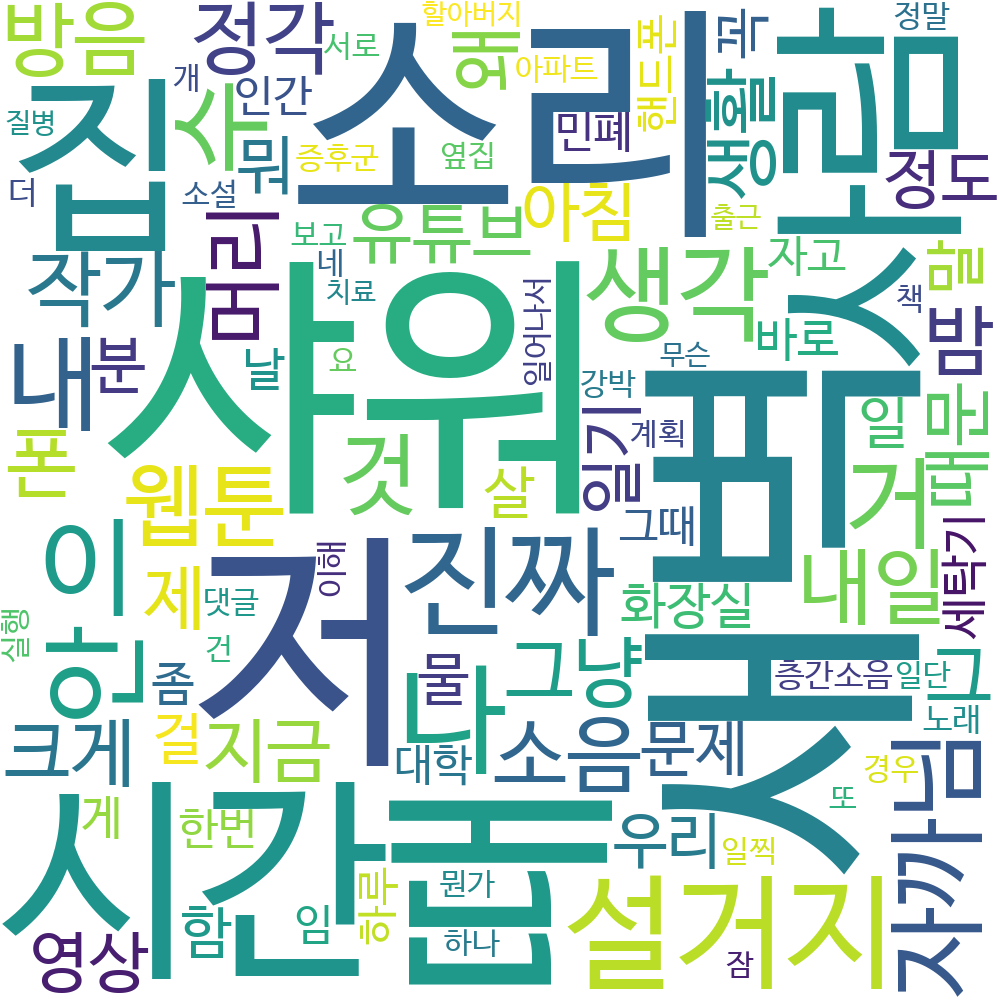

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
wc.to_file('wc.png')
img = cv2.imread('wc.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)